# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [95]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [96]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9


ReadTimeout: HTTPSConnectionPool(host='www.airlinequality.com', port=443): Read timed out. (read timeout=None)

In [97]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | I flew from Malaga via LHR to...
1,✅ Trip Verified | Milan to Miami return via L...
2,✅ Trip Verified | BA created a new low-cost s...
3,✅ Trip Verified | I flew with British Airway...
4,✅ Trip Verified | Manchester to Copenhagen vi...


In [98]:
df.to_csv("C:\\Users\\USER\\Documents\\Work\\BA\\data\\BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [99]:
df

,reviews
0,Not Verified | I flew from Malaga via LHR to...
1,✅ Trip Verified | Milan to Miami return via L...
2,✅ Trip Verified | BA created a new low-cost s...
3,✅ Trip Verified | I flew with British Airway...
4,✅ Trip Verified | Manchester to Copenhagen vi...
...,...
795,Not Verified | London to Boston. Comfortable f...
796,✅ Trip Verified | Tirana to London Gatwick. I ...
797,✅ Trip Verified | Gatwick to St Lucia. Great ...
798,✅ Trip Verified | London to Singapore. I have...


In [100]:
# Getting Verified Tickets
df["Verified"] = df.reviews.str.contains("Trip Verified")

In [101]:
df

,reviews,Verified
0,Not Verified | I flew from Malaga via LHR to...,False
1,✅ Trip Verified | Milan to Miami return via L...,True
2,✅ Trip Verified | BA created a new low-cost s...,True
3,✅ Trip Verified | I flew with British Airway...,True
4,✅ Trip Verified | Manchester to Copenhagen vi...,True
...,...,...
795,Not Verified | London to Boston. Comfortable f...,False
796,✅ Trip Verified | Tirana to London Gatwick. I ...,True
797,✅ Trip Verified | Gatwick to St Lucia. Great ...,True
798,✅ Trip Verified | London to Singapore. I have...,True


## Data Cleaning

In [102]:
df["Clean_reviews"] = df.reviews.str.split("|", expand = True)[1]

In [103]:
df

,reviews,Verified,Clean_reviews
0,Not Verified | I flew from Malaga via LHR to...,False,I flew from Malaga via LHR to Boston on the...
1,✅ Trip Verified | Milan to Miami return via L...,True,Milan to Miami return via London. Worst busi...
2,✅ Trip Verified | BA created a new low-cost s...,True,BA created a new low-cost subsidiary in BA E...
3,✅ Trip Verified | I flew with British Airway...,True,I flew with British Airways from Heathrow t...
4,✅ Trip Verified | Manchester to Copenhagen vi...,True,Manchester to Copenhagen via London on 30th ...
...,...,...,...
795,Not Verified | London to Boston. Comfortable f...,False,London to Boston. Comfortable flight in econo...
796,✅ Trip Verified | Tirana to London Gatwick. I ...,True,Tirana to London Gatwick. I fly British Airwa...
797,✅ Trip Verified | Gatwick to St Lucia. Great ...,True,Gatwick to St Lucia. Great service on this f...
798,✅ Trip Verified | London to Singapore. I have...,True,London to Singapore. I have to commend BA st...


- Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.



- Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

In [104]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
import string

# # Download missing NLTK resources
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')

## POS - TAGGING

In [105]:
pos_dict = { "J" : wordnet.ADJ , "N" : wordnet.NOUN, "V" : wordnet.VERB, "R" : wordnet.ADV }

# Define a function for tokenization, stopword removal, and POS tagging
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    stop_words = set(stopwords.words("english"))
    new_list = []
    for word, tag in tags:
        if word.lower() not in stop_words and word.lower() not in string.punctuation:
            new_list.append(tuple([word, pos_dict.get(tag[0])]))

    return new_list

# Assuming you have DataFrame `df` and column `Clean_reviews`
df["POS_tagged"] = df["Clean_reviews"].apply(token_stop_pos)
df.head()


,reviews,Verified,Clean_reviews,POS_tagged
0,Not Verified | I flew from Malaga via LHR to...,False,I flew from Malaga via LHR to Boston on the...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)..."
1,✅ Trip Verified | Milan to Miami return via L...,True,Milan to Miami return via London. Worst busi...,"[(Milan, n), (Miami, n), (return, n), (via, No..."
2,✅ Trip Verified | BA created a new low-cost s...,True,BA created a new low-cost subsidiary in BA E...,"[(BA, n), (created, v), (new, a), (low-cost, a..."
3,✅ Trip Verified | I flew with British Airway...,True,I flew with British Airways from Heathrow t...,"[(flew, v), (British, a), (Airways, n), (Heath..."
4,✅ Trip Verified | Manchester to Copenhagen vi...,True,Manchester to Copenhagen via London on 30th ...,"[(Manchester, n), (Copenhagen, n), (via, None)..."


## Lemmatization

In [106]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))


def lemmatise(pos_data):
    #Loop through each review to remove stopwords, and make it lower case
     corpus = []
     for word, pos in pos_data:
         if not pos:
             lemma = word.lower()
             corpus.append(lemma)
         else:
             lemma = lemmatizer.lemmatize(word.lower(), pos = pos) 
             if lemma not in stop_words and lemma not in string.punctuation:
                 corpus.append(lemma)

     return " ".join(corpus)

df["Lemma_review"] = df["POS_tagged"].apply(lemmatise)
df.head()

,reviews,Verified,Clean_reviews,POS_tagged,Lemma_review
0,Not Verified | I flew from Malaga via LHR to...,False,I flew from Malaga via LHR to Boston on the...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)...",fly malaga via lhr boston 4th may 2024 arrival...
1,✅ Trip Verified | Milan to Miami return via L...,True,Milan to Miami return via London. Worst busi...,"[(Milan, n), (Miami, n), (return, n), (via, No...",milan miami return via london worst business c...
2,✅ Trip Verified | BA created a new low-cost s...,True,BA created a new low-cost subsidiary in BA E...,"[(BA, n), (created, v), (new, a), (low-cost, a...",ba create new low-cost subsidiary ba euroflyer...
3,✅ Trip Verified | I flew with British Airway...,True,I flew with British Airways from Heathrow t...,"[(flew, v), (British, a), (Airways, n), (Heath...",fly british airway heathrow hannover although ...
4,✅ Trip Verified | Manchester to Copenhagen vi...,True,Manchester to Copenhagen via London on 30th ...,"[(Manchester, n), (Copenhagen, n), (via, None)...",manchester copenhagen via london 30th april 20...


In [107]:
## Checking for missing values
df.Lemma_review.isnull().sum()

0

No Missing Valuues in Customer review

## Sentiment Analysis using VADER

- VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

- Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [108]:
# !pip install vaderSentiment

In [109]:
# nltk.download('vader_lexicon')

In [110]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to perform sentiment analysis using VADER
def get_sentiment(reviews):
    # Get sentiment scores
    scores = analyzer.polarity_scores(reviews)
    return scores["compound"]

df["Sentiment"]  = df["Lemma_review"].apply( get_sentiment)

# function to analyse
def analysis(compound):
# Classify sentiment based on compound score
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each text sample
df['Analysis'] = df['Sentiment'].apply(analysis)

df

,reviews,Verified,Clean_reviews,POS_tagged,Lemma_review,Sentiment,Analysis
0,Not Verified | I flew from Malaga via LHR to...,False,I flew from Malaga via LHR to Boston on the...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)...",fly malaga via lhr boston 4th may 2024 arrival...,-0.7184,Negative
1,✅ Trip Verified | Milan to Miami return via L...,True,Milan to Miami return via London. Worst busi...,"[(Milan, n), (Miami, n), (return, n), (via, No...",milan miami return via london worst business c...,-0.9148,Negative
2,✅ Trip Verified | BA created a new low-cost s...,True,BA created a new low-cost subsidiary in BA E...,"[(BA, n), (created, v), (new, a), (low-cost, a...",ba create new low-cost subsidiary ba euroflyer...,0.9874,Positive
3,✅ Trip Verified | I flew with British Airway...,True,I flew with British Airways from Heathrow t...,"[(flew, v), (British, a), (Airways, n), (Heath...",fly british airway heathrow hannover although ...,-0.8992,Negative
4,✅ Trip Verified | Manchester to Copenhagen vi...,True,Manchester to Copenhagen via London on 30th ...,"[(Manchester, n), (Copenhagen, n), (via, None)...",manchester copenhagen via london 30th april 20...,0.4588,Positive
...,...,...,...,...,...,...,...
795,Not Verified | London to Boston. Comfortable f...,False,London to Boston. Comfortable flight in econo...,"[(London, n), (Boston, n), (Comfortable, a), (...",london boston comfortable flight economy class...,0.7783,Positive
796,✅ Trip Verified | Tirana to London Gatwick. I ...,True,Tirana to London Gatwick. I fly British Airwa...,"[(Tirana, n), (London, n), (Gatwick, n), (fly,...",tirana london gatwick fly british airway aroun...,0.9890,Positive
797,✅ Trip Verified | Gatwick to St Lucia. Great ...,True,Gatwick to St Lucia. Great service on this f...,"[(Gatwick, n), (St, n), (Lucia, n), (Great, n)...",gatwick st lucia great service flight thank mu...,0.9371,Positive
798,✅ Trip Verified | London to Singapore. I have...,True,London to Singapore. I have to commend BA st...,"[(London, n), (Singapore, n), (commend, v), (B...",london singapore commend ba staff occasion fri...,0.9151,Positive


In [111]:
count =df["Analysis"].value_counts()
count

Analysis
Positive    437
Negative    351
Neutral      12
Name: count, dtype: int64

## Pie Chart Visualization

([<matplotlib.patches.Wedge at 0x1661ca52bc0>,
 [Text(-0.1592666953400698, 1.0884089855176011, 'Positive'),
  Text(0.10781875186900518, -1.0947032094341416, 'Negative'),
  Text(1.3485013249394342, -0.06359384118443405, 'Neutral')],
 [Text(-0.08687274291276532, 0.593677628464146, '54.6%'),
  Text(0.05881022829218464, -0.5971108415095316, '43.9%'),
  Text(0.8490563897766807, -0.04004056667168069, '1.5%')])

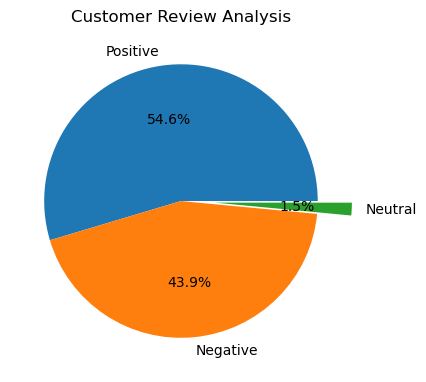

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Customer Review Analysis")
plt.pie(count.values, labels = count.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

## Wordcloud

- Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

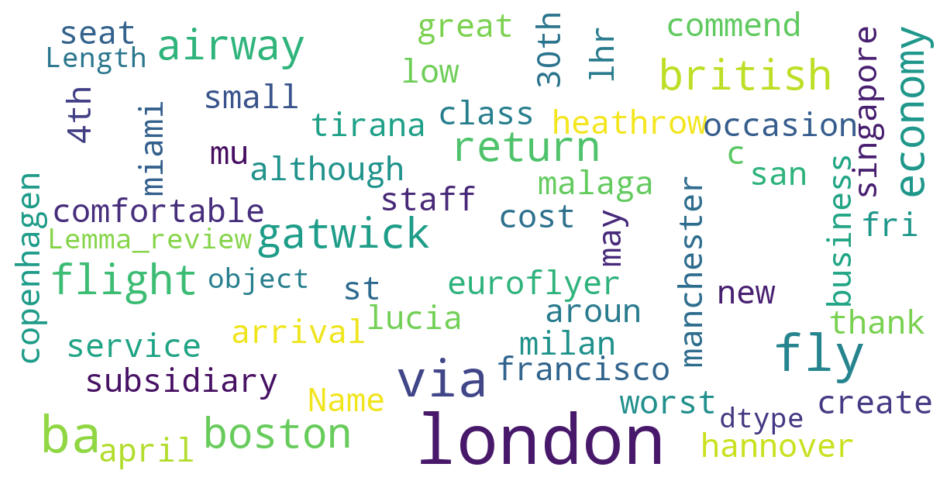

In [113]:
from wordcloud import WordCloud

stop_words = set(stopwords.words("english"))

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        max_words=500,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud, interpolation= 'bilinear')
    plt.show()

show_wordcloud(df.Lemma_review)

In [114]:
data = df.copy()

## Words Frequency

In [115]:
df

,reviews,Verified,Clean_reviews,POS_tagged,Lemma_review,Sentiment,Analysis
0,Not Verified | I flew from Malaga via LHR to...,False,I flew from Malaga via LHR to Boston on the...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)...",fly malaga via lhr boston 4th may 2024 arrival...,-0.7184,Negative
1,✅ Trip Verified | Milan to Miami return via L...,True,Milan to Miami return via London. Worst busi...,"[(Milan, n), (Miami, n), (return, n), (via, No...",milan miami return via london worst business c...,-0.9148,Negative
2,✅ Trip Verified | BA created a new low-cost s...,True,BA created a new low-cost subsidiary in BA E...,"[(BA, n), (created, v), (new, a), (low-cost, a...",ba create new low-cost subsidiary ba euroflyer...,0.9874,Positive
3,✅ Trip Verified | I flew with British Airway...,True,I flew with British Airways from Heathrow t...,"[(flew, v), (British, a), (Airways, n), (Heath...",fly british airway heathrow hannover although ...,-0.8992,Negative
4,✅ Trip Verified | Manchester to Copenhagen vi...,True,Manchester to Copenhagen via London on 30th ...,"[(Manchester, n), (Copenhagen, n), (via, None)...",manchester copenhagen via london 30th april 20...,0.4588,Positive
...,...,...,...,...,...,...,...
795,Not Verified | London to Boston. Comfortable f...,False,London to Boston. Comfortable flight in econo...,"[(London, n), (Boston, n), (Comfortable, a), (...",london boston comfortable flight economy class...,0.7783,Positive
796,✅ Trip Verified | Tirana to London Gatwick. I ...,True,Tirana to London Gatwick. I fly British Airwa...,"[(Tirana, n), (London, n), (Gatwick, n), (fly,...",tirana london gatwick fly british airway aroun...,0.9890,Positive
797,✅ Trip Verified | Gatwick to St Lucia. Great ...,True,Gatwick to St Lucia. Great service on this f...,"[(Gatwick, n), (St, n), (Lucia, n), (Great, n)...",gatwick st lucia great service flight thank mu...,0.9371,Positive
798,✅ Trip Verified | London to Singapore. I have...,True,London to Singapore. I have to commend BA st...,"[(London, n), (Singapore, n), (commend, v), (B...",london singapore commend ba staff occasion fri...,0.9151,Positive


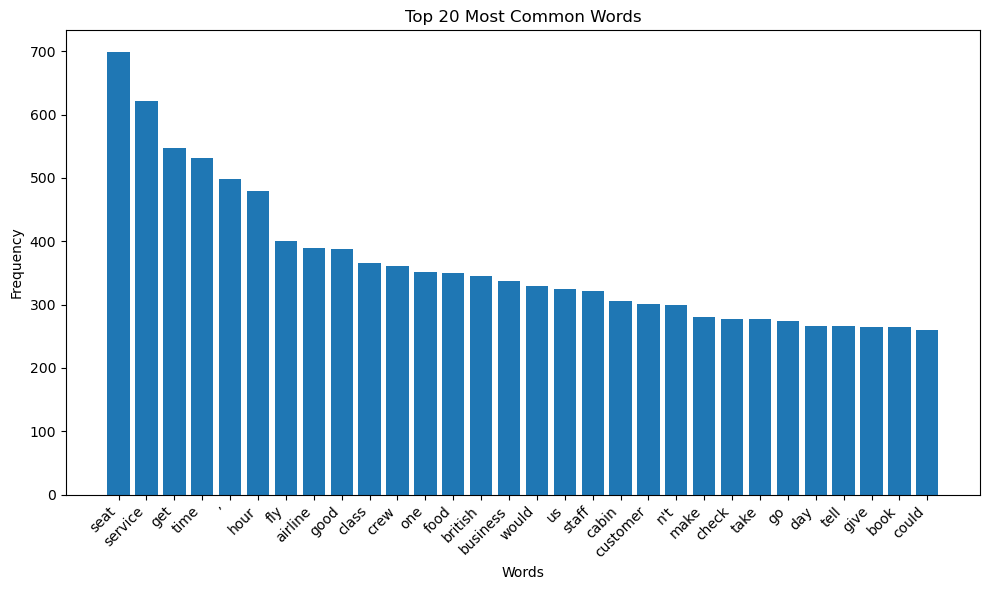

        Word  Frequency
0       seat        698
1    service        621
2        get        547
3       time        532
4          ’        498
5       hour        480
6        fly        401
7    airline        389
8       good        387
9      class        366
10      crew        361
11       one        352
12      food        350
13   british        345
14  business        337
15     would        330
16        us        325
17     staff        322
18     cabin        306
19  customer        301
20       n't        300
21      make        280
22     check        278
23      take        277
24        go        274
25       day        266
26      tell        266
27      give        265
28      book        265
29     could        260


In [118]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd


review = df['Lemma_review'].str.split(" ") 

# Define words to be removed
words_to_remove = ["flight", "britshh", "ba", "review", "passenger", "london", "frequency", "plan", "airway", 
                   "hearthrow", "burcharest", "james", "milan", "boston", "subscidary", "vancover", "caligary",
                   "miami", "houston", "malaga", "may", "world", "euroflyer", "4th", "hannover", "lemma_review"]

# Remove stopwords and unwanted words
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for sublist in review for word in sublist if word.lower() not in stop_words and word.lower() not in words_to_remove]

# Generate n-grams (you can specify n as needed)
n = 1  
ngram_tokens = list(ngrams(filtered_tokens, n))

# Calculate frequency distribution
freq_dist = FreqDist(ngram_tokens)

# Get top 20 most common n-grams
top_30_common = freq_dist.most_common(30)

# # Create dataframe for words and their frequency
# df_frequency = pd.DataFrame({'Word': [' '.join(ngram) for ngram in top_20_common], 'Frequency': [count for _, count in top_20_common]})

# Extract n-grams and frequency counts separately
ngrams_list = [' '.join(ngram) for ngram, _ in top_20_common]
frequency_list = [count for _, count in top_20_common]

# Create dataframe for words and their frequency
df_frequency = pd.DataFrame({'Word': ngrams_list, 'Frequency': frequency_list})


# Plot frequency histogram
plt.figure(figsize=(10, 6))
plt.bar(df_frequency['Word'], df_frequency['Frequency'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the dataframe
print(df_frequency)



# # Create dataframe for words and their frequency
# df_frequency = pd.DataFrame(top_20_common, columns=['Word', 'Frequency'])